In [1]:
# Dependencies
import numpy as np
import pandas as pd

In [2]:
censuses_data = pd.read_csv("./CSV/censuses.csv")
censuses_data = censuses_data[censuses_data["census_year"] == 1900]
censuses_data.head()

,line_number,house_number,street_name,last_name,given_name,relation,color_race,sex,age_at_last_birthday,occupation,own_or_rent,owned_free_or_mortgage,house_or_farm,my_notes,file_name,census_year
0,65,830,Arthur St,Brown,Eliza,Boarder,B,F,26,Servant,Null,Null,Null,Null,1900 census ED 70 page 2,1900
1,63,830,Arthur St,Butcher,John H.,Boarder,B,M,27,Drayman,Null,Null,Null,Null,1900 census ED 70 page 2,1900
2,61,830,Arthur St,Olliver,Marsha,Head,B,F,25,Laundress,Rent,Null,House,Null,1900 census ED 70 page 2,1900
3,64,830,Arthur St,Spivey,Neata,Boarder,B,F,25,Servant,Null,Null,Null,Null,1900 census ED 70 page 2,1900
4,62,830,Arthur St,Wells,Ethel,Daughter,B,F,8,At School,Null,Null,Null,Null,1900 census ED 70 page 2,1900


In [3]:
# Separate out the occupation which are null/ none (LATER we can test our model again these cases)
occupation_missing_mask = (censuses_data["occupation"].str.contains('None')) | (censuses_data["occupation"].str.contains('Null'))
df_missing_occupation = censuses_data[occupation_missing_mask]
df_missing_occupation.count()

line_number               321
house_number              321
street_name               321
last_name                 321
given_name                321
relation                  321
color_race                321
sex                       321
age_at_last_birthday      321
occupation                321
own_or_rent               321
owned_free_or_mortgage    321
house_or_farm             321
my_notes                  321
file_name                 321
census_year               321
dtype: int64

In [27]:
# prepare new df where occupation column is All labelled
df_all_occupation = censuses_data[occupation_missing_mask == False]
df_all_occupation.relation.unique()

array(['Boarder', 'Head', 'Daughter', 'Son', 'Granddaughter', 'Nephew',
       'Son-in-law', 'Niece', 'Cousin', 'Step-Daughter', 'Brother',
       'Wife', 'Sister', 'Lodger', 'Stepson', 'Stepdaughter', 'Partner',
       'Father', 'Grandson', 'Brother-in-law', 'Daughter-in-law',
       'Adopted Daughter', 'Servant', 'Sister-in-law', 'Roomer'],
      dtype=object)

In [28]:
# Prepare our X & y to create model with labelled 'occupation' column

# include following features that MAY influence occupation field -
# color_race, sex, age_at_last_birthday, occupation
newdata = df_all_occupation[["relation","color_race","sex","age_at_last_birthday", "occupation"]]

newdata["color_race"].replace("B", 1, inplace=True) # Replace B by 1
newdata["color_race"].replace("W", 0, inplace=True) # Replace W by 0

newdata["sex"].replace("M", 1, inplace=True) # Replace M by 1
newdata["sex"].replace("F", 0, inplace=True) # Replace F by 0

D:\Users\kshah\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [29]:
# Create dictionary to convert relation into unique numbers
relation = {}
counter = 1
for rel in newdata["relation"].unique():
    relation[rel] = counter
    counter += 1
print(relation)

{'Boarder': 1, 'Head': 2, 'Daughter': 3, 'Son': 4, 'Granddaughter': 5, 'Nephew': 6, 'Son-in-law': 7, 'Niece': 8, 'Cousin': 9, 'Step-Daughter': 10, 'Brother': 11, 'Wife': 12, 'Sister': 13, 'Lodger': 14, 'Stepson': 15, 'Stepdaughter': 16, 'Partner': 17, 'Father': 18, 'Grandson': 19, 'Brother-in-law': 20, 'Daughter-in-law': 21, 'Adopted Daughter': 22, 'Servant': 23, 'Sister-in-law': 24, 'Roomer': 25}


In [5]:
# Create dictionary to convert occupation into unique numbers
occupation = {}
counter = 1
for occ in newdata["occupation"].unique():
    occupation[occ] = counter
    counter += 1
print(occupation)

{'Servant': 1, 'Drayman': 2, 'Laundress': 3, 'At School': 4, 'Day Laborer': 5, 'Janitor': 6, 'Coachman': 7, 'Expressman': 8, 'Farm Laborer': 9, 'Mason': 10, 'Nurse': 11, 'Railroad Laborer': 12, 'Cook': 13, 'Housework': 14, 'Bartender': 15, 'Seamstress': 16, 'Carpenter': 17, 'Barber': 18, 'Gardener': 19, 'Porter': 20, 'Tailor': 21, 'Teamster': 22, 'Dishwasher (hotel)': 23, 'Bricklayer': 24, 'Baker': 25, 'Upholsterer': 26, 'Blacksmith': 27, 'Drummer': 28, 'Chopping Wood': 29, 'Hotel Waiter': 30, 'Clergyman': 31, 'Musician': 32, 'Office Girl': 33, 'Stock Raiser': 34, 'Mid-wife': 35, 'Teacher': 36, 'Gravedigger': 37, 'Yardman': 38, 'Sexton': 39, 'Painter': 40, 'Woodchopper': 41, 'Hairdresser': 42, 'Brick Mason': 43, 'Brick Burner': 44, 'Huckster': 45, 'Agent (Machines)': 46, 'Iron Molder': 47, 'Machinist': 48, 'Errand Boy': 49, 'Jeweler': 50, 'Waiter': 51, 'Cotton Sampler': 52, 'Fireman': 53, 'Grocer': 54, 'Shoemaker': 55, 'Laundryman': 56, 'Bale Hides': 57, 'Landlord': 58, 'Bottling (Brew

In [30]:
newdata["relation"].replace(relation, inplace=True) # replace relation text by number
newdata["occupation"].replace(occupation, inplace=True) # replace occupation text by number

newdata.head()

,relation,color_race,sex,age_at_last_birthday,occupation
0,1,1,0,26,1
1,1,1,1,27,2
2,2,1,0,25,3
3,1,1,0,25,1
4,3,1,0,8,4


In [53]:
# METHOD 1: Using Logistic regression method
X = newdata.drop(["sex"], axis=1)
y = newdata["sex"]

print(X.shape, y.shape)

(487, 4) (487,)


In [45]:
# Split data for Train & test purpose
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=185, test_size=1/3)

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6697530864197531
Testing Data Score: 0.6196319018404908


D:\Users\kshah\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
# METHOD 2: Using K-mean clustering method

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=59)

# Fit the model to the data
kmeans.fit(newdata)

predicted_clusters = kmeans.predict(newdata)

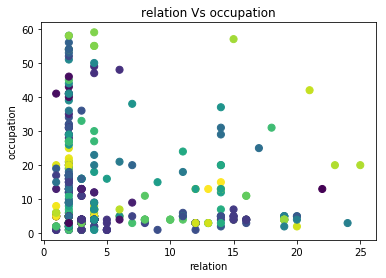

In [80]:
import matplotlib.pyplot as plt

plt.scatter(newdata["relation"], newdata["occupation"],c=predicted_clusters, s=50, cmap='viridis')
plt.title("relation Vs occupation")
plt.xlabel("relation")
plt.ylabel("occupation")
plt.show()

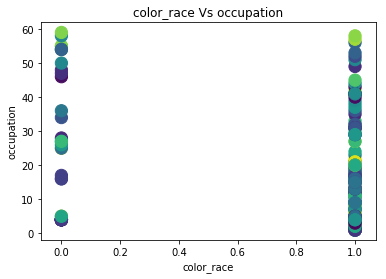

In [83]:
plt.scatter(newdata["color_race"], newdata["occupation"],c=predicted_clusters, s=150, cmap='viridis')
plt.title("color_race Vs occupation")
plt.xlabel("color_race")
plt.ylabel("occupation")
plt.show()